In [1]:
# install packages
# !pip install tensorflow
!pip install brian2tools
# load files from url
# !wget file_url

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.9/87.9 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.8/359.8 kB 18.3 MB/s eta 0:00:00



## Artificial Neural Network (ANN) vs Spiking Neural Network (SNN)

This is a slightly comparison btw ANN vs SNN:

| Feature                | Artificial Neural Networks (ANNs)                    | Spiking Neural Networks (SNNs)                      |
|------------------------|------------------------------------------------------|-----------------------------------------------------|
| **Basic Operation**    | Process information in continuous-valued signals.     | Communicate using discrete, time-based events (spikes).|
| **Representation of Information** | Represented in continuous values.              | Represented in spikes, with timing as crucial information.|
| **Energy Efficiency**  | Less biologically plausible, computationally expensive. | More biologically plausible, potentially more energy-efficient.|
| **Temporal Processing**| Not inherently designed for precise temporal processing. | Naturally handles temporal aspects through spike timing.|
| **Learning Paradigms** | Commonly use backpropagation and gradient descent.    | Involves spike-timing-dependent plasticity (STDP) for learning.|


### ANN - Hello World!

In [4]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a simple ANN model
model = Sequential()
model.add(Dense(units=1, input_dim=1, activation='linear'))

# Compile the model
model.compile(optimizer='sgd', loss='mean_squared_error')

# Input data
X_train = np.array([1.0])
y_train = np.array([2.0])

# Train the model
model.fit(
    X_train, y_train,
    epochs=10,
    # verbose=1
    # verbose=0
)

# Predict using the trained model
prediction = model.predict(np.array([3.0]))

print(f"prediction: {prediction} \
      prediction-shape: {prediction.shape} \
      prediction-dim: {prediction.ndim} \
      prediction-type: {type(prediction)}\n")

print("Artificial Neural Network - Hello, World!")
print(f"Prediction: {prediction[0][0]}")

Epoch 1/10
1/1 [==============================] - 0s 288ms/step - loss: 5.7033
Epoch 2/10
1/1 [==============================] - 0s 12ms/step - loss: 5.2561
Epoch 3/10
1/1 [==============================] - 0s 11ms/step - loss: 4.8441
Epoch 4/10
1/1 [==============================] - 0s 12ms/step - loss: 4.4643
Epoch 5/10
1/1 [==============================] - 0s 10ms/step - loss: 4.1143
Epoch 6/10
1/1 [==============================] - 0s 12ms/step - loss: 3.7917
Epoch 7/10
1/1 [==============================] - 0s 9ms/step - loss: 3.4945
Epoch 8/10
1/1 [==============================] - 0s 9ms/step - loss: 3.2205
Epoch 9/10
1/1 [==============================] - 0s 9ms/step - loss: 2.9680
Epoch 10/10
1/1 [==============================] - 0s 49ms/step
prediction: [[0.4363996]]       prediction-shape: (1, 1)       prediction-dim: 2       prediction-type: <class 'numpy.ndarray'>

Artificial Neural Network - Hello, World!
Prediction: 0.4363996088504791


### SNN - Hello World!

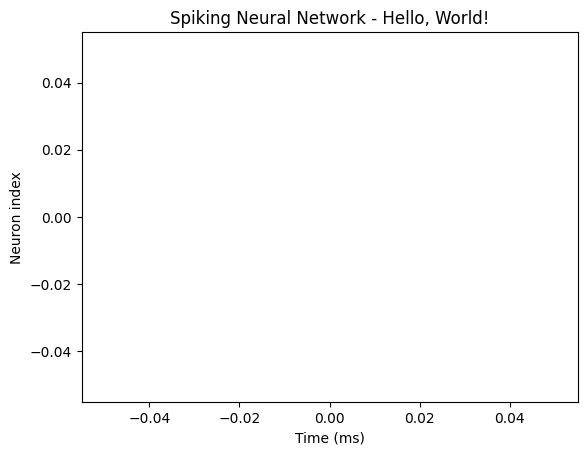

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from brian2 import *

# Set up the SNN simulation
start_scope()

# Define the SNN model
# eqs = '''
# dv/dt = (0.2 - v) / tau : 1
# '''

tau = 10 * ms  # Adjust the value as needed

eqs = '''
dv/dt = (0.2 - v) / tau : 1
'''

# Create a neuron group with one neuron
neurons = NeuronGroup(1, eqs, threshold='v > 1', reset='v = 0', method='linear')

# Create a spike monitor to record spikes
spike_monitor = SpikeMonitor(neurons)

# Set the initial membrane potential
neurons.v = 0.5

# Run the simulation for a short time
run(50 * ms)

# Plot the spikes
plt.plot(spike_monitor.t/ms, spike_monitor.i, 'o')
plt.xlabel('Time (ms)')
plt.ylabel('Neuron index')
plt.title('Spiking Neural Network - Hello, World!')
plt.show()

## References
- None